In [1]:
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

# Data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


In [2]:
df = pd.read_csv(r'C:\Users\svive\Youtube Indian Gamers Data analysis\All_gamers_data/final-data.csv', index_col=0)

In [3]:
#Dropped the unnamed column
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,actualStartTime,actualEndTime,PublishDayName,durationSecs,titleLength,played_games,Year_of_video_PublishAt,Time_of_PublishAT
0,Dbck3q6cGTo,Chapati Hindustani Gamer,KITCHEN MEIN POPAT HO GEYA,KITCHEN MEIN POPAT HO GEYA . Toh bhai logo ple...,"['chapati hindustani gamer', 'chapati', 'chapa...",2023-01-04 07:00:03+00:00,509977.0,24363.0,1354.0,PT11M55S,NaN,NaN,Wednesday,715.0,26,NaN,2023,07:00:03
1,Fh1J8Cf28zs,Chapati Hindustani Gamer,"WINNIE THE POOH NE DARA DIYA 😲, ESCAPE KESSE K...","WINNIE THE POOH NE DARA DIYA 😲, ESCAPE KESSE K...","['roblox', 'gameplay', 'games', 'funny', 'funn...",2023-01-01 07:00:08+00:00,559023.0,35501.0,1328.0,PT16M29S,NaN,NaN,Sunday,989.0,60,roblox,2023,07:00:08
2,RzjVJcaidAg,Chapati Hindustani Gamer,"I PAID MONEY TO WIN HYPIXEL SKYBLOCK 😂, IS THI...","I PAID MONEY TO WIN HYPIXEL SKYBLOCK 😂, IS THI...","['chapati', 'chapati hindustani gamer', 'chapa...",2022-12-29 08:00:08+00:00,694963.0,42985.0,795.0,PT8M25S,NaN,NaN,Thursday,505.0,72,minecraft,2022,08:00:08
3,xCIKxTV2oQQ,Chapati Hindustani Gamer,😨 GTA 5 KI GHOST STORY #shorts,😨 GTA 5 KI GHOST STORY #shorts,"['chapati', 'chapati hindustani gamer', 'techn...",2022-12-27 08:00:30+00:00,526408.0,54198.0,169.0,PT1M,NaN,NaN,Tuesday,60.0,30,gta 5,2022,08:00:30
4,g1n-jN53Krs,Chapati Hindustani Gamer,I TRIED PAKISTANI SNACKS 😉 !!! KIYA YE SNACKS ...,I TRIED PAKISTANI SNACKS 😉 !!! KIYA YE SNACKS ...,NaN,2022-12-24 08:00:14+00:00,981393.0,46072.0,3832.0,PT10M39S,NaN,NaN,Saturday,639.0,66,NaN,2022,08:00:14


### *View Distribution of  Channels*

In [6]:
#taking first 50 channels for view count distribution 

In [7]:
view_distribution_of_channel = df.groupby('channelTitle')['viewCount'].sum().reset_index()

In [8]:
df2 = view_distribution_of_channel.set_index('channelTitle')

C:\Users\svive\anacondasetup\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


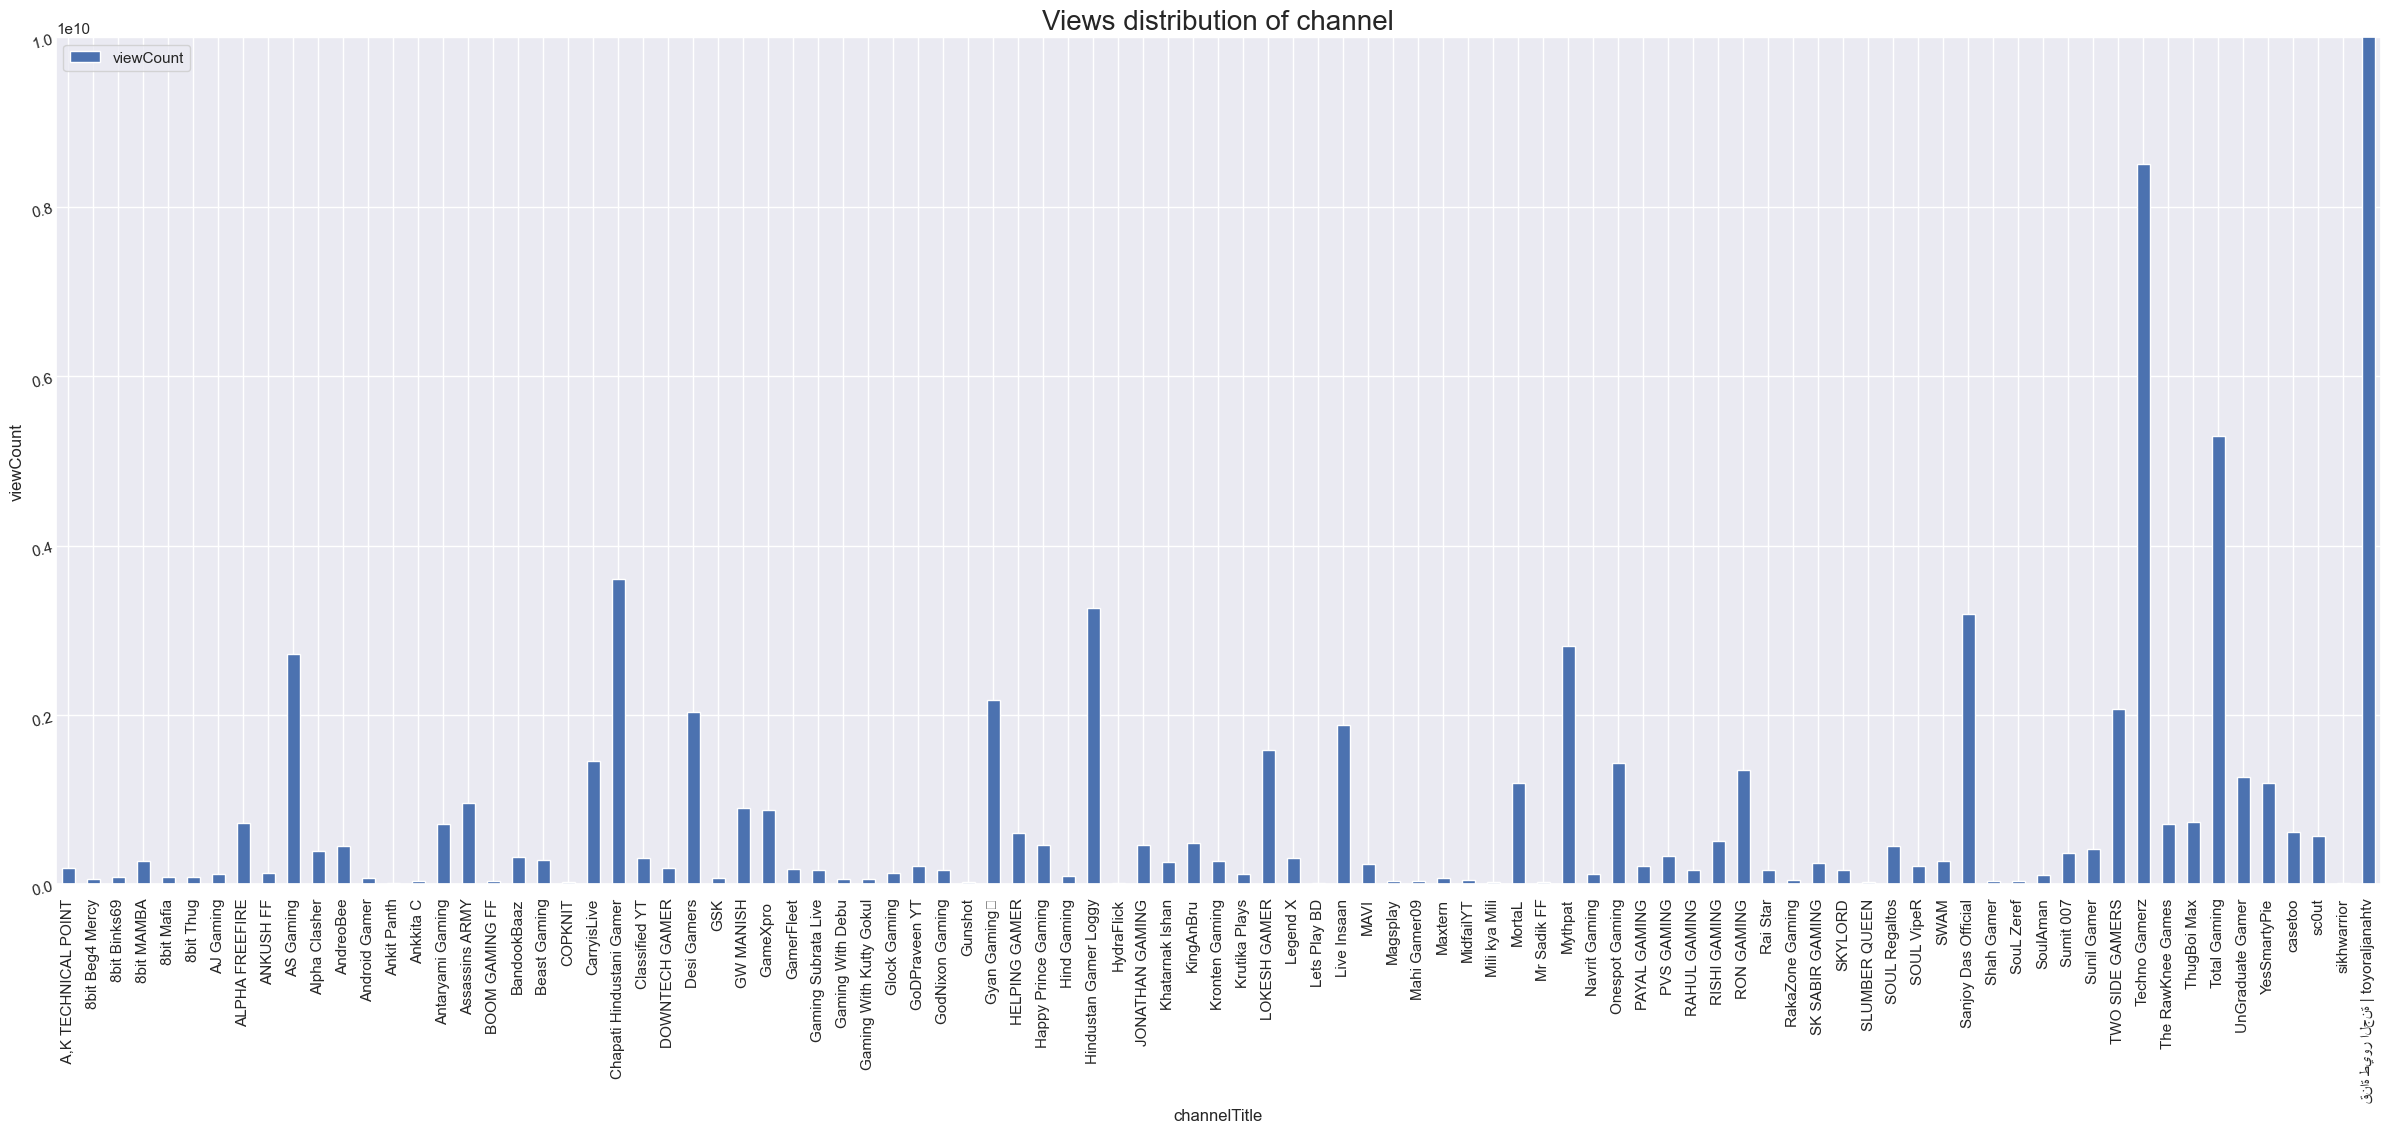

In [9]:
df2.plot(kind='bar', figsize=(30,11))
plt.xticks(rotation=90,horizontalalignment="center")
plt.yticks(rotation=15, horizontalalignment="center")
plt.ylim(0,10000000000)
plt.ylabel('viewCount')
plt.xlabel('channelTitle')
plt.title('Views distribution of channel', fontsize = 20)
plt.show()

With the video statistics for all channel, now we can see how the views are distributed per channel. 
Some channels might have a lot of views on one of their videos and the rest do not receive many views. Other channels might have more evenly distribution views per video

It can be observed that toyoraijanahtv, techno gamerz, total gaming have quite large variance in their views, 
suggesting that they have a few viral videos. 

### Does the number of likes count and comment count matter to get the number views 

<Axes: xlabel='likeCount', ylabel='viewCount'>

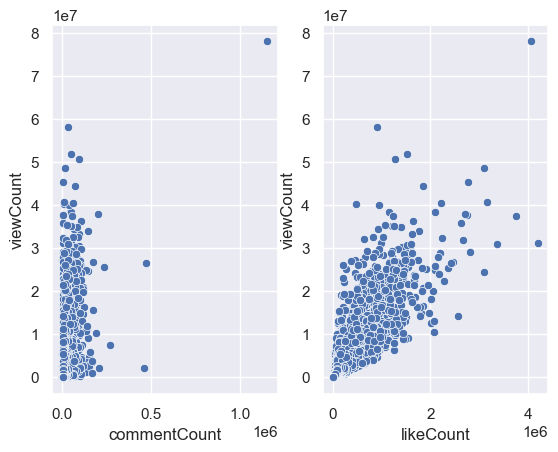

In [10]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = df, x = "likeCount", y = "viewCount", ax=ax[1])

In the plots, it can be observed that the number of views and number of comments/ likes strongly correlated with each other. 
The number of likes seems to suggest stronger correlation than the number of comments. 
However, this is expected as the more people watching a video, the more likely this video will get comments and likes. 
To correct for this factor, we will plot these relationships again using the comments per 1000 view and likes per 1000 view ratios.

In [11]:
df2 = df[df['played_games'].notnull()]

### Most Number of Played games view_count

In [12]:
df3 = df2.groupby(['played_games'])['viewCount'].count().reset_index()

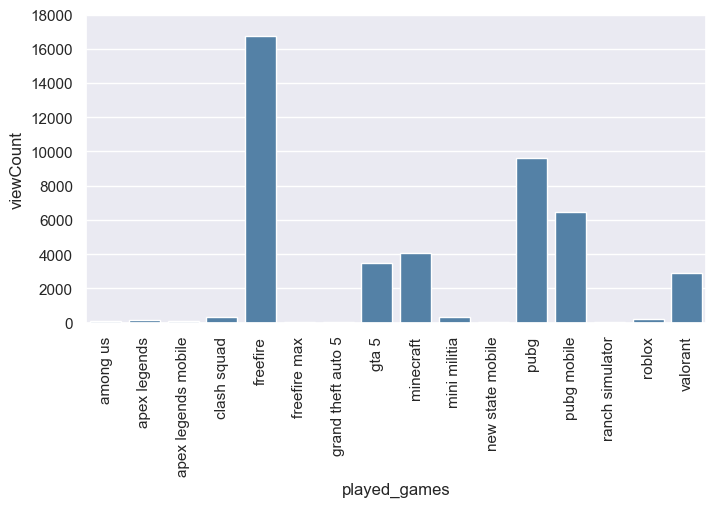

In [13]:
plt.figure(figsize=(8, 4), dpi=None)
plt.xticks(rotation = 90, horizontalalignment='center')
plt.ylim(0,18000)
sns.set_style('dark')
sns.set_palette('pastel')
sns.barplot(data=df3, x='played_games', y='viewCount', color='steelblue')
plt.show()

In [14]:
df2

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,actualStartTime,actualEndTime,PublishDayName,durationSecs,titleLength,played_games,Year_of_video_PublishAt,Time_of_PublishAT
1,Fh1J8Cf28zs,Chapati Hindustani Gamer,"WINNIE THE POOH NE DARA DIYA 😲, ESCAPE KESSE K...","WINNIE THE POOH NE DARA DIYA 😲, ESCAPE KESSE K...","['roblox', 'gameplay', 'games', 'funny', 'funn...",2023-01-01 07:00:08+00:00,559023.0,35501.0,1328.0,PT16M29S,NaN,NaN,Sunday,989.0,60,roblox,2023,07:00:08
2,RzjVJcaidAg,Chapati Hindustani Gamer,"I PAID MONEY TO WIN HYPIXEL SKYBLOCK 😂, IS THI...","I PAID MONEY TO WIN HYPIXEL SKYBLOCK 😂, IS THI...","['chapati', 'chapati hindustani gamer', 'chapa...",2022-12-29 08:00:08+00:00,694963.0,42985.0,795.0,PT8M25S,NaN,NaN,Thursday,505.0,72,minecraft,2022,08:00:08
3,xCIKxTV2oQQ,Chapati Hindustani Gamer,😨 GTA 5 KI GHOST STORY #shorts,😨 GTA 5 KI GHOST STORY #shorts,"['chapati', 'chapati hindustani gamer', 'techn...",2022-12-27 08:00:30+00:00,526408.0,54198.0,169.0,PT1M,NaN,NaN,Tuesday,60.0,30,gta 5,2022,08:00:30
5,qwg3zG_i0sY,Chapati Hindustani Gamer,"SO I LOST 1,700,000,000 in HYPIXEL, I AM SAD N...","SO I LOST 1,700,000,000 in HYPIXEL, I AM SAD N...","['chapati', 'chapati hindustani gamer', 'chapa...",2022-12-17 08:00:31+00:00,907002.0,47906.0,910.0,PT14M59S,NaN,NaN,Saturday,899.0,62,minecraft,2022,08:00:31
6,DmjRamrcNW4,Chapati Hindustani Gamer,🔥Minecraft INFINITE Glitch VS Real Life INFINI...,🔥Minecraft INFINITE Glitch VS Real Life INFINI...,NaN,2022-12-12 05:49:57+00:00,2133877.0,225156.0,280.0,PT59S,NaN,NaN,Monday,59.0,63,minecraft,2022,05:49:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91892,k97hguFB_KA,Navrit Gaming,My Wife Played GTA 5 For The First Time: GTA 5...,In this gta 5 game play video my wife played g...,"['my wife played gta 5 for the first time', 'p...",2020-04-14 12:18:52+00:00,35444.0,1912.0,105.0,PT19M40S,NaN,NaN,Tuesday,1180.0,62,gta 5,2020,12:18:52
91893,izQ3MWuhE8w,Navrit Gaming,killing The President in GTA 5: GTA 5 in Hindi...,In this gta 5 gameplay we are going to kill mr...,"['killing the president in gta 5', 'gta 5 pres...",2020-04-10 05:18:22+00:00,22032.0,984.0,72.0,PT14M45S,NaN,NaN,Friday,885.0,53,gta 5,2020,05:18:22
91894,rxVolUPzr48,Navrit Gaming,Stealing Michael's Car - Went Wrong: GTA 5 in ...,In this gta 5 game play video we are going to ...,"['pubg live stream', 'pubg mobile live', 'indi...",2020-04-02 14:50:11+00:00,11533.0,602.0,23.0,PT9M45S,NaN,NaN,Thursday,585.0,58,gta 5,2020,14:50:11
91895,gX-S90ZfCTM,Navrit Gaming,Stealing Expensive Bike From Ballas Gang | GTA...,In this mission Franklin and his best friend L...,"['repossession gta v mission', 'gta 5 in hindi...",2020-03-28 04:35:46+00:00,15582.0,802.0,22.0,PT10M44S,NaN,NaN,Saturday,644.0,64,gta 5,2020,04:35:46


In Y-axis we have video count and we can see that freefire, pubg, minecraft, gta 5 and valorant are the few games which have played morethan other or 
we can say that it streams more than other games  


In [15]:
game_played_over_years = df2[['Year_of_video_PublishAt', 'played_games']]

In [16]:
game_played_over_years

,Year_of_video_PublishAt,played_games
1,2023,roblox
2,2022,minecraft
3,2022,gta 5
5,2022,minecraft
6,2022,minecraft
...,...,...
91892,2020,gta 5
91893,2020,gta 5
91894,2020,gta 5
91895,2020,gta 5


In [17]:
game_year = df2[['Year_of_video_PublishAt', 'played_games']]

In [18]:
game_year

,Year_of_video_PublishAt,played_games
1,2023,roblox
2,2022,minecraft
3,2022,gta 5
5,2022,minecraft
6,2022,minecraft
...,...,...
91892,2020,gta 5
91893,2020,gta 5
91894,2020,gta 5
91895,2020,gta 5


#### as we can see the number of games have been increased which is streamed or played over the years by streamer/youtuber

In [19]:
df_2016 = game_year[game_year['Year_of_video_PublishAt'] == 2016]
df_2017 = game_year[game_year['Year_of_video_PublishAt'] == 2017]
df_2018 = game_year[game_year['Year_of_video_PublishAt'] == 2018]
df_2019 = game_year[game_year['Year_of_video_PublishAt'] == 2019]
df_2020 = game_year[game_year['Year_of_video_PublishAt'] == 2020]
df_2021 = game_year[game_year['Year_of_video_PublishAt'] == 2021]
df_2022 = game_year[game_year['Year_of_video_PublishAt'] == 2022]
df_2023 = game_year[game_year['Year_of_video_PublishAt'] == 2023]

In [20]:
category_counts_2016 = df_2016['played_games'].value_counts()
category_counts_2017 = df_2017['played_games'].value_counts()
category_counts_2018 = df_2018['played_games'].value_counts()
category_counts_2019 = df_2019['played_games'].value_counts()
category_counts_2020 = df_2020['played_games'].value_counts()
category_counts_2021 = df_2021['played_games'].value_counts()
category_counts_2022 = df_2022['played_games'].value_counts()
category_counts_2023 = df_2023['played_games'].value_counts()

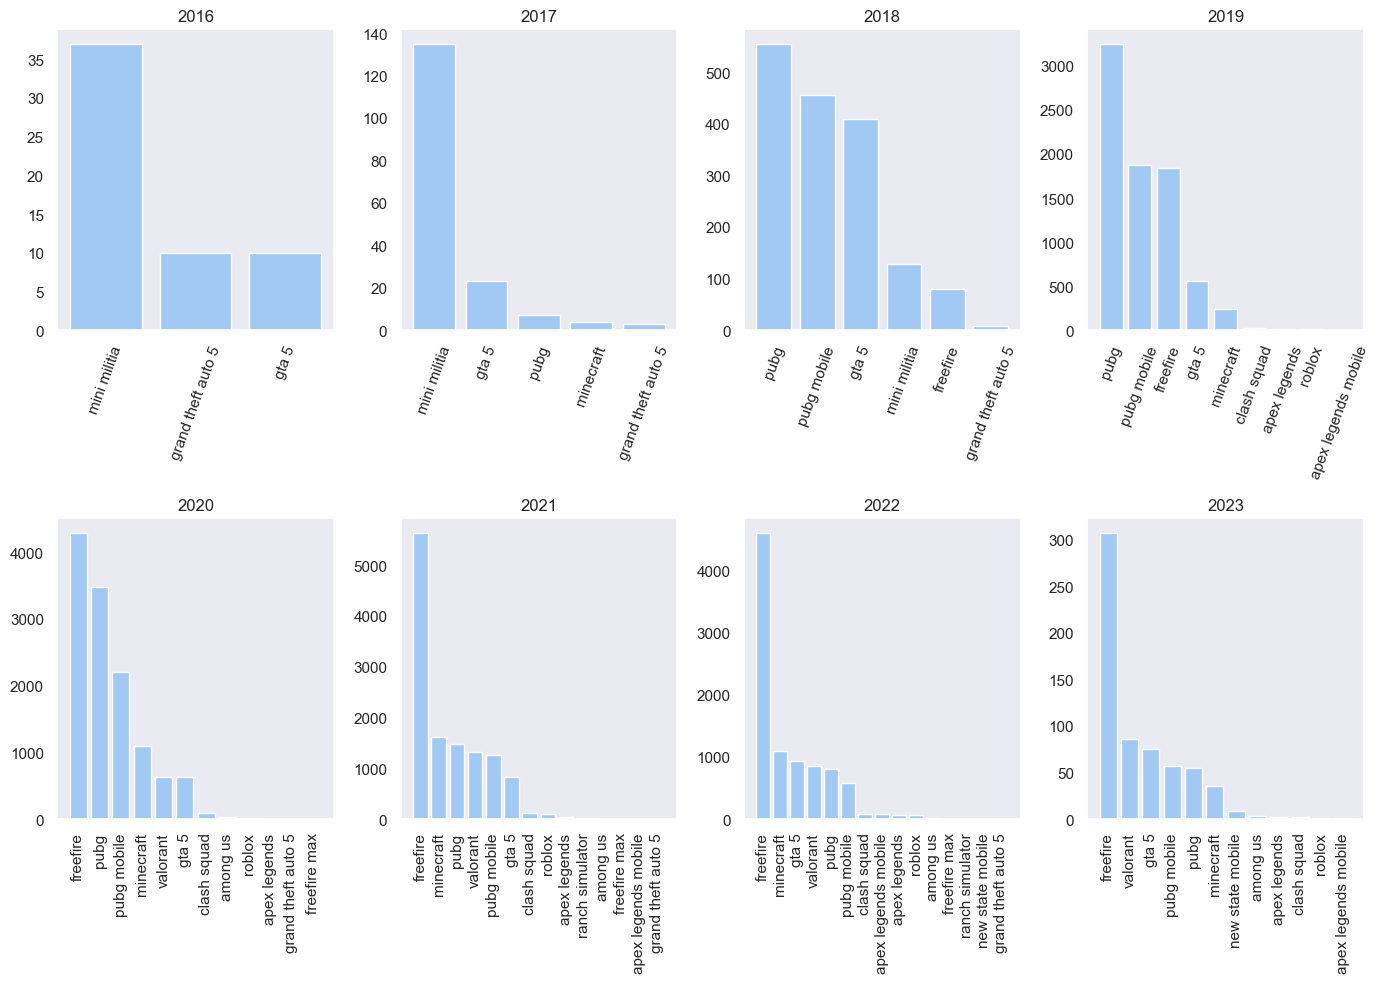

In [21]:
plt.figure(figsize=(14,10))

plt.subplot(2,4,1)
plt.bar(category_counts_2016.index, category_counts_2016.values)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title('2016')

plt.subplot(2,4,2)
plt.bar(category_counts_2017.index, category_counts_2017.values)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title('2017')

plt.subplot(2,4,3)
plt.bar(category_counts_2018.index, category_counts_2018.values)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title('2018')

plt.subplot(2,4,4)
plt.bar(category_counts_2019.index, category_counts_2019.values)
plt.xticks(rotation=70, horizontalalignment="center")
plt.title('2019')


plt.subplot(2,4,5)
plt.bar(category_counts_2020.index, category_counts_2020.values)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('2020')


plt.subplot(2,4,6)
plt.bar(category_counts_2021.index, category_counts_2021.values)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('2021')


plt.subplot(2,4,7)
plt.bar(category_counts_2022.index, category_counts_2022.values)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('2022')

plt.subplot(2,4,8)
plt.bar(category_counts_2023.index, category_counts_2023.values)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('2023')

plt.tight_layout()
plt.show()

In [22]:
#### "as we can see the number of games has been increased since 2016 from 3 games being stream to more than 10 games are streamed and 
#### popular amongst streamer
#### top 3 games over the year is freefire, pubg, mini militia"

In [30]:
df2['Time_of_PublishAT'] = pd.to_datetime(df2['Time_of_PublishAT'], format='%H:%M')
time_of_vieo_publish = df2.groupby(pd.Grouper(key='Time_of_PublishAT', freq='2H'))['video_id'].count().reset_index()
#finding the upload of videos in 2 hour frquency or span

C:\Users\svive\AppData\Local\Temp\ipykernel_3124\4144964998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Time_of_PublishAT'] = pd.to_datetime(df2['Time_of_PublishAT'], format='%H:%M')


In [55]:
time_of_vieo_publish['hours'] = time_of_vieo_publish['Time_of_PublishAT'].dt.hour
time_of_vieo_publish

,Time_of_PublishAT,video_id,hours
0,1900-01-01 00:00:00,568,0
1,1900-01-01 02:00:00,3684,2
2,1900-01-01 04:00:00,5953,4
3,1900-01-01 06:00:00,5260,6
4,1900-01-01 08:00:00,5165,8
5,1900-01-01 10:00:00,4494,10
6,1900-01-01 12:00:00,5108,12
7,1900-01-01 14:00:00,5069,14
8,1900-01-01 16:00:00,3176,16
9,1900-01-01 18:00:00,3169,18


(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

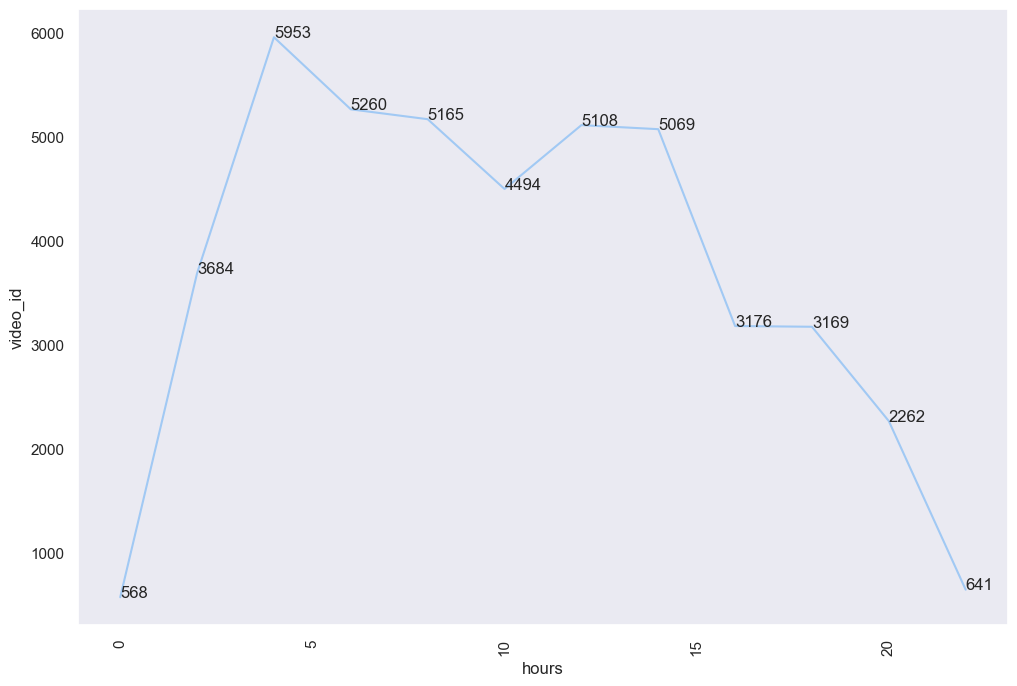

In [68]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='hours', y='video_id', data=time_of_vieo_publish)
for line in range(0,time_of_vieo_publish.shape[0]):
     ax.text(time_of_vieo_publish.hours[line], time_of_vieo_publish.video_id[line], time_of_vieo_publish.video_id[line])
        
plt.xticks(rotation=90, horizontalalignment="center")

In [ ]:
#### 'here we can see the most number of uploads between 5 to 10 hour(means morning 5 am to 10 am) gamera usually awakes or stream at midnight only'

In [26]:
# Things to do 
#which weekdays the most video published, 
#which weekday most video uploads, 
#average video length